<a href="https://colab.research.google.com/github/Macteos/wimp_fimp_simp_thesis/blob/main/WIMP_SIMP_FIMP_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.integrate import solve_ivp
import scipy.special as sp

# Solving for WIMPs ODE

### Base Equation Wimp:

$\frac{dY}{dx} = - \lambda x^{-2}(Y^2-Y_{EQ}^2)$

let's start by making a function for Yeq:
$Y_{EQ} = 0.145 \frac{g}{g_{*s}}x^{3/2}e^{-x}$

Where g are the degrees of freedom, we will work with g = 1.

And g*s counts the total number of effectively massless degrees of freedom, it has it's own function.

In [ ]:
g = 1
g_ = 100
g_s = 100
σv = 1e-12
m = 100
m_pl = 1.22e19
def Yeq(x):
    return 45*(g/g_s)*x**2*(1/(4*np.pi**4))*(sp.kn(2,(x)))

##Now we want to make a function for λ:

$ \lambda = \frac{x <\sigma |v|>s}{H(m)} $


Where $<\sigma |v|>$ will be changed manually.

$H(m) = 1.66 g_*^{1/2} \frac{T^2}{m_{Pl}}$

We find H in our new variable x = m/T

$H(x) = 1.66 g_*^{1/2} \frac{m^2}{x^2m_{Pl}}$

In [ ]:
def H(x):
    return 1.66 * g_**(1/2) * m**2/(x**2 * m_pl)

$s= \frac{2\pi^2}{45}g_{*s}T^3$

$s= \frac{2\pi^2}{45}g_{*s}\frac{m^3}{x^3}$

In [ ]:
def s(x):
    return (2*np.pi**2/45)*g_s*(m**3/x**3)

Now we can put this together to find λ

In [ ]:
def λ(x):
    return (x*σv*s(x))/H(x)

## We can now put everthing together to make the WIMP equation

In [ ]:
#Define the differential equation
def dydx(x,Y):
    return -λ(x)*(x**(-2))*(Y**2-Yeq(x)**2)

In [ ]:
#Current Observed Y
xf=10**3
Y0 = np.ones(xf)*(4.3e-12)
x_Y0 = np.linspace(1, xf,xf)

In [ ]:
def Y0(xi,xf,m):
    Y0 = np.ones(xf)*(4.3e-10/m)
    x_Y0 = np.linspace(xi, xf,xf)
    return (x_Y0 , Y0)

In [ ]:
m=100
x0 = 6  # Initial value of x
y0 = 1e-2  # Initial value of y at x = x0
initial_condition = (x0, y0)
x_range = (1, xf)  # Range of x values

In [ ]:
#Solution 1
σv = 1.5e-8
solution = solve_ivp(dydx, x_range, initial_condition, method="LSODA", max_step=0.02)
x_values , y_values = solution.t , solution.y[0]

In [ ]:
#Solution 2
σv = 1.5e-9
solution2 = solve_ivp(dydx, x_range, initial_condition, method="LSODA", max_step=0.02)
x_values2 , y_values2 = solution2.t , solution2.y[0]

In [ ]:
#Solution 3
σv = 1.5e-10
solution3 = solve_ivp(dydx, x_range, initial_condition, method="LSODA", max_step=0.02)
x_values3 , y_values3 = solution3.t , solution3.y[0]

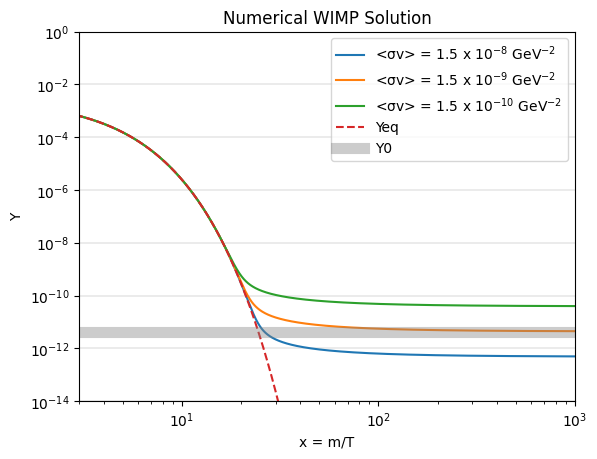

<Figure size 640x480 with 0 Axes>

In [ ]:
x = np.logspace(0,3,xf)

plt.loglog(x_values, y_values , label= '<σv> = 1.5 x 10$^{-8}$ GeV$^{-2}$')
plt.grid(axis = "y", lw = 0.35)
plt.loglog(x_values2, y_values2, label = "<σv> = 1.5 x 10$^{-9}$ GeV$^{-2}$")
plt.loglog(x_values3, y_values3, label = "<σv> = 1.5 x 10$^{-10}$ GeV$^{-2}$")
plt.loglog(x, Yeq(x),label='Yeq', linestyle = "dashed") #Y in equilibrium
plt.loglog(Y0(1,xf,m)[0],Y0(1,xf,m)[1], label="Y0", linewidth=8, alpha=0.4, color="grey") #Y observed
plt.xlim(3,xf)
plt.ylim(1e-14,1)
plt.xlabel('x = m/T')
plt.ylabel('Y')
plt.title('Numerical WIMP Solution')
plt.legend(loc='upper right', fontsize="10")
plt.show()
plt.savefig("WIMP numerical.png")

## Let's change the mass to see what happens

In [ ]:
#Define the differential equation
def dydx(x,Y):
    return -λ(x)*(x**(-2))*(Y**2-Yeq(x)**2)

In [ ]:
x0 = 6  # Initial value of x
xf = 10**3
y0 = 1e-2  # Initial value of y at x = x0
initial_condition = (x0, y0)
x_range = (1, xf)  # Range of x values

In [ ]:
#Solution 1
σv = 1.5e-9
m = 10
solution = solve_ivp(dydx, x_range, initial_condition, method="LSODA", max_step=0.02)
x_values , y_values = solution.t , solution.y[0]
Y01 = Y0(1,xf,m)

In [ ]:
#Solution 2
σv = 1.5e-9
m = 100
solution2 = solve_ivp(dydx, x_range, initial_condition, method="LSODA", max_step=0.02)
x_values2 , y_values2 = solution2.t , solution2.y[0]
Y02 = Y0(1,xf,m)

In [ ]:
#Solution 3
σv = 1.5e-9
m = 1000
solution3 = solve_ivp(dydx, x_range, initial_condition, method="LSODA", max_step=0.02)
x_values3 , y_values3 = solution3.t , solution3.y[0]
Y03 = Y0(1,xf,m)

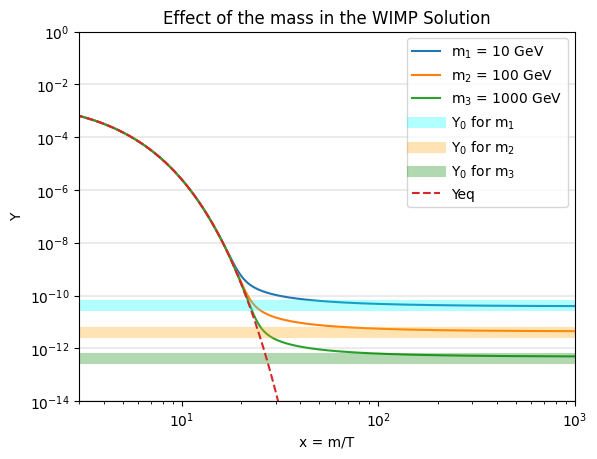

<Figure size 640x480 with 0 Axes>

In [ ]:
x = np.logspace(0,3,xf)

plt.loglog(x_values, y_values, label="m$_1$ = 10 GeV")
plt.grid(axis = "y", lw = 0.35)
plt.loglog(x_values2, y_values2, label="m$_2$ = 100 GeV")
plt.loglog(x_values3, y_values3, label="m$_3$ = 1000 GeV")
plt.loglog(Y01[0],Y01[1], label="Y$_0$ for m$_1$", linewidth=8, alpha=0.3, color="cyan") #Y observed
plt.loglog(Y02[0],Y02[1], label="Y$_0$ for m$_2$", linewidth=8, alpha=0.3, color="orange") #Y observed
plt.loglog(Y03[0],Y03[1], label="Y$_0$ for m$_3$", linewidth=8, alpha=0.3, color="green") #Y observed
plt.loglog(x, Yeq(x),label='Yeq', linestyle = "dashed") #Y in equilibrium
plt.xlim(3,xf)
plt.ylim(1e-14,1)
plt.xlabel('x = m/T')
plt.ylabel('Y')
plt.title('Effect of the mass in the WIMP Solution')
plt.legend(loc='upper right')
plt.show()
plt.savefig("WIMP numerical.png")

### We now try to find the apropriate $<\sigma |v|>$ to get the observed dark matter density in the late universe.

We have found that:

$m Y_0=\Omega_{\mathrm{dm}} h^2 \frac{1}{s_0} \frac{\rho_c}{h^2} \simeq 4.3 \times 10^{-10} \mathrm{GeV}$


so considering m = 100GeV, we should get,

$Y_0 = 4.3 \times 10^{-8}\mathrm{GeV}$

In [ ]:
#Solution 1
σv = 1.5e-9
m = 100
initial_condition = (50,1e-8)
xf = 10**3
x_range = (1, xf)
solution = solve_ivp(dydx, x_range, initial_condition, method="LSODA", rtol = 1e-7, max_step = 0.02)
x_values , y_values = solution.t , solution.y[0]

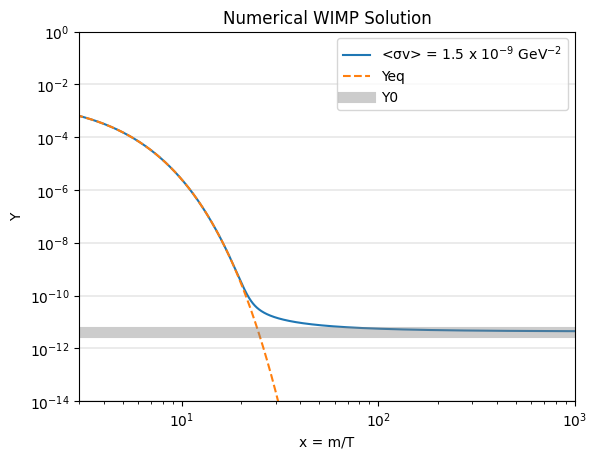

<Figure size 640x480 with 0 Axes>

In [ ]:
x = np.logspace(0,3,xf)

plt.loglog(x_values, y_values)
plt.grid(axis = "y", lw = 0.35)
#plt.loglog(x_values2, y_values2, linestyle = "dashed")
#plt.loglog(x_values3, y_values3, linestyle = "dashed")
plt.loglog(x, Yeq(x),label='Yeq', linestyle = "dashed") #Y en equilibrio
plt.loglog(Y0(1,xf,m)[0],Y0(1,xf,m)[1], label="Y0", linewidth=8, alpha=0.4, color="grey") #Y observed
plt.xlim(3,xf)
plt.ylim(1e-14,1)
plt.xlabel('x = m/T')
plt.ylabel('Y')
plt.title('Numerical WIMP Solution')
plt.legend(("<σv> = 1.5 x 10$^{-9}$ GeV$^{-2}$", "Yeq", "Y0"),
           loc='upper right')
plt.show()
plt.savefig("WIMP numerical.png")

#WIMP Analitical

The analitical aproximation we found is made of two function. Before the freeze out point xf we have $Y_{eq}(x)$ and after we found $Y = \frac{x_f}{λ}$

In [ ]:
σv = 1.5e-9
m = 100
xf = 10**3
xaxis = np.logspace(0,4,xf)
def Δ(x):
    return 22/λ(x)

yaxis = []
for x in range(1,(xf + 1)):  #starts at 1 to avoid division by 0.
    yaxis.append(Δ(x))

## Comparing analitical and numerical solution for WIMP model

In [ ]:
#Numerical solution to compare (σv = 5.6e-12)
σv = 1.5e-9
m = 100
x_range = (1, xf)
solution = solve_ivp(dydx, x_range, initial_condition, method="LSODA",t_eval=np.linspace(1,xf,xf), max_step=0.02)
x_num , y_num = solution.t , solution.y[0]

Text(0.5, 1.0, 'Comparison of analitical and numerical solution for WIMP mechanism')

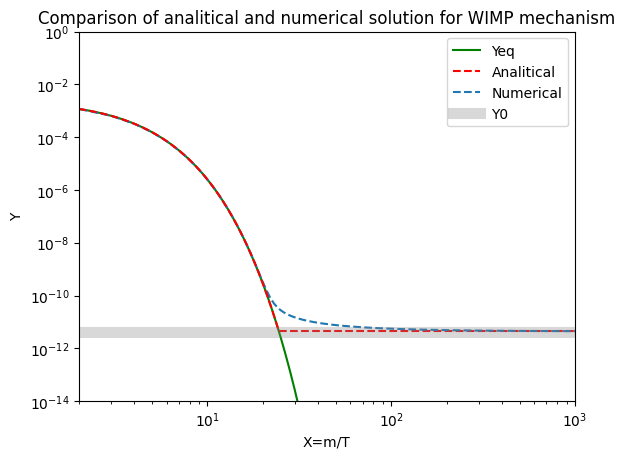

In [ ]:
xm1 = np.ma.masked_where(xaxis < 24.5, xaxis)
xm3 = np.ma.masked_where(xaxis > 24.5, xaxis)


plt.loglog(xaxis, Yeq(xaxis),label='Yeq', color = "green") #Y In equilibrium
plt.loglog(xm1, yaxis,label='Analitical', color = "red", linestyle = "dashed") #Y After freeze out in analitical solution
plt.loglog(x_num, y_num, label = "Numerical", linestyle = "dashed")
plt.loglog(xm3, Yeq(xaxis), color = "red", linestyle = "dashed") #Y In equilibrium
plt.loglog(Y0(1,xf,m)[0],Y0(1,xf,m)[1], label="Y0", linewidth=8, alpha=0.3, color="grey") #Y observed


plt.xlabel("X=m/T")
plt.ylabel("Y")
plt.ylim(1e-14,1)
plt.xlim(2,xf)
plt.legend(loc='upper right')
plt.title("Comparison of analitical and numerical solution for WIMP mechanism")

# FIMP Numerical Solution

### Base Equation Fimp:

$\frac{dY}{dx} = \lambda x^{-2}Y_{EQ}^2$

In [ ]:
#Solution 1
def Yeq(x):
    return 45*(g/g_s)*x**2*(1/(4*np.pi**4))*(sp.kn(2,(x)))

def dydx(x,Y):
    return -λ(x)*(x**(-2))*(Y**2-Yeq(x)**2)

σv = 3e-30
m = 100
xi = 1e-1
xf = 10**3
x_range = (xi, xf)
solution = solve_ivp(dydx, x_range, [1e-75], method="LSODA", t_eval = np.logspace(np.log10(xi), np.log10(xf), 100), max_step = 0.02)
x_values , y_values = solution.t , solution.y[0]

In [ ]:
σv = 3e-29
solution2 = solve_ivp(dydx, x_range, [1e-75], method="LSODA", t_eval = np.logspace(np.log10(xi), np.log10(xf), 100), max_step = 0.02)
x_values2 , y_values2 = solution2.t , solution2.y[0]

In [ ]:
σv = 3e-28
solution3 = solve_ivp(dydx, x_range, [1e-75], method="LSODA", t_eval = np.logspace(np.log10(xi), np.log10(xf), 100), max_step = 0.02)
x_values3 , y_values3 = solution3.t , solution3.y[0]

In [ ]:
#Y actual observado
#Y0 = np.ones(xf)*(4.3e-12)
#x_Y0 = np.linspace(xi, xf,xf)

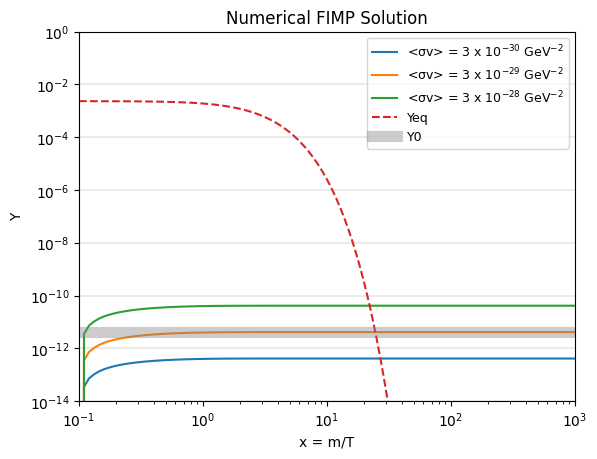

<Figure size 640x480 with 0 Axes>

In [ ]:
x = np.logspace(np.log10(xi),np.log10(xf),10**4)

plt.loglog(x_values, y_values)
plt.grid(axis = "y", lw = 0.35)
plt.loglog(x_values2, y_values2)
plt.loglog(x_values3, y_values3)
plt.loglog(x, Yeq(x),label='Yeq', linestyle = "dashed") #Y In equilibrium
plt.loglog(Y0(xi,xf,m)[0],Y0(xi,xf,m)[1], label="Y0", linewidth=8, alpha=0.4, color="grey") #Y observed
plt.xlim(xi,xf)
plt.ylim(1e-14,1)
plt.xlabel('x = m/T')
plt.ylabel('Y')
plt.title('Numerical FIMP Solution')
plt.legend(('<σv> = 3 x 10$^{-30}$ GeV$^{-2}$','<σv> = 3 x 10$^{-29}$ GeV$^{-2}$','<σv> = 3 x 10$^{-28}$ GeV$^{-2}$', "Yeq", "Y0"),
           loc='upper right', fontsize = "9")
plt.show()
plt.savefig("FIMP numerical.png")

### Now let's see how the mass afects the evolution of Y for the FIMP mecanism

In [ ]:
#Solution 1
σv = 3e-29
m = 10
xi = 1e-1
xf = 10**2
x_range = (xi, xf)
solution = solve_ivp(dydx, x_range, [1e-75], method="LSODA", t_eval = np.logspace(np.log10(xi), np.log10(xf), 100), max_step = 0.02)
x_values , y_values = solution.t , solution.y[0]
Y01 = Y0(xi,xf,m)

In [ ]:
#Solution 2
m = 100
solution2 = solve_ivp(dydx, x_range, [1e-75], method="LSODA", t_eval = np.logspace(np.log10(xi), np.log10(xf), 100), max_step = 0.02)
x_values2 , y_values2 = solution2.t , solution2.y[0]
Y02 = Y0(xi,xf,m)

In [ ]:
#Solution 3
m = 10000
solution3 = solve_ivp(dydx, x_range, [1e-75], method="LSODA", t_eval = np.logspace(np.log10(xi), np.log10(xf), 100), max_step = 0.02)
x_values3 , y_values3 = solution3.t , solution3.y[0]
Y03 = Y0(xi,xf,m)

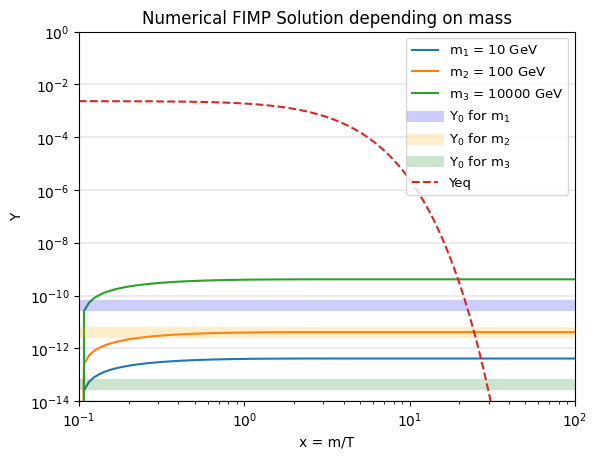

<Figure size 640x480 with 0 Axes>

In [ ]:
x = np.logspace(np.log10(xi),np.log10(xf),10**4)

plt.loglog(x_values, y_values, label = "m$_1$ = 10 GeV")
plt.grid(axis = "y", lw = 0.35)
plt.loglog(x_values2, y_values2, label = "m$_2$ = 100 GeV")
plt.loglog(x_values3, y_values3, label = "m$_3$ = 10000 GeV")
plt.loglog(Y01[0],Y01[1], label="Y$_0$ for m$_1$", linewidth=8, alpha=0.2, color="blue") #Y observed for solution 1
plt.loglog(Y02[0],Y02[1], label="Y$_0$ for m$_2$", linewidth=8, alpha=0.2, color="orange") #Y observed for solution 2
plt.loglog(Y03[0],Y03[1], label="Y$_0$ for m$_3$", linewidth=8, alpha=0.2, color="green") #Y observed for solution 3
plt.loglog(x, Yeq(x),label='Yeq', linestyle = "dashed") #Y in equilibrium
#plt.loglog(x_Y0, Y0, label="Y0", linewidth=8, alpha=0.4, color="grey") #Y observed
plt.xlim(xi,xf)
plt.ylim(1e-14,1)
plt.xlabel('x = m/T')
plt.ylabel('Y')
plt.title('Numerical FIMP Solution depending on mass')
plt.legend(loc='upper right',fontsize= "9.5")
plt.show()
plt.savefig("FIMP numerical.png")

# SIMP Numerical Solution

### Base Equation Simp:

$\frac{dY}{dx} = - \frac{<\sigma |v^2> s^2 }{H(m)x^3}(Y^3-Y^2 Y_{EQ})$

$\frac{dY}{dx} = - \frac{<\sigma |v^2|> s^2 }{H(x)x}(Y^3-Y^2 Y_{EQ})$

We parameterize the temperture dependence of the annihilation cross section:

$\frac{dY}{dx} = - \lambda_{3→2}(Y^3-Y^2 Y_{EQ})$

Where $\lambda_{3→2} = \frac{<\sigma |v^2|> s^2 }{H(m)x^3}$

In [ ]:
#Define the differential equation
def λs(x):
    return (σv*s(x)**2)/(H(x)*x**3)

def dydx(x,Y):
    return -λs(x)*(Y**3 - (Y**2)*Yeq(x))

In [ ]:
m=0.1
x0 = 15  # Initial value of x
y0 = 1e-3  # Initial value of y at x = x0
xf = 100
initial_condition = (x0, y0)
x_range = (10, xf)  # Range of x values

In [ ]:
σv = 3e9
solution = solve_ivp(dydx, x_range, initial_condition, method="LSODA", max_step=0.02)
Sx_values , Sy_values = solution.t , solution.y[0]

In [ ]:
σv = 3e7
solution2 = solve_ivp(dydx, x_range, initial_condition, method="LSODA", max_step=0.02)
Sx_values2 , Sy_values2 = solution2.t , solution2.y[0]

In [ ]:
σv = 3e5
solution3 = solve_ivp(dydx, x_range, initial_condition, method="LSODA", max_step=0.02)
Sx_values3 , Sy_values3 = solution3.t , solution3.y[0]

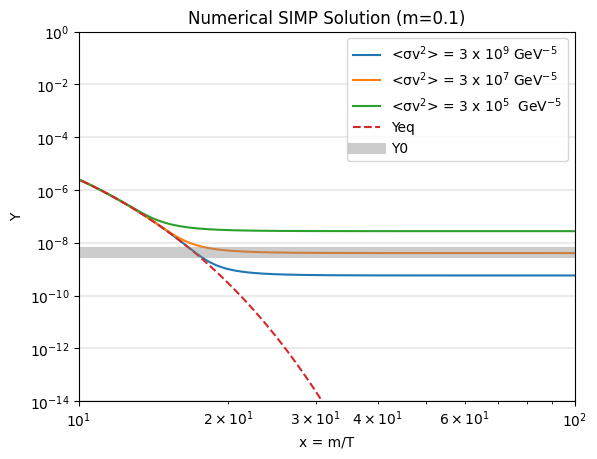

In [ ]:
x = np.logspace(0,np.log10(xf),1000)

plt.loglog(Sx_values, Sy_values, label= "<σv$^2$> = 3 x 10$^{9}$ GeV$^{-5}$")
plt.grid(axis = "y", lw = 0.35)
plt.loglog(Sx_values2, Sy_values2, label= "<σv$^2$> = 3 x 10$^{7}$ GeV$^{-5}$")
plt.loglog(Sx_values3, Sy_values3, label= "<σv$^2$> = 3 x 10$^{5}$  GeV$^{-5}$")
plt.loglog(x, Yeq(x),label='Yeq', linestyle = "dashed") #Y en equilibrio
plt.loglog(Y0(1,xf,m)[0],Y0(1,xf,m)[1], label="Y0", linewidth=8, alpha=0.4, color="grey") #Y observado
plt.xlim(10,xf)
plt.ylim(1e-14,1)
plt.xlabel('x = m/T')
plt.ylabel('Y')
plt.title('Numerical SIMP Solution (m=0.1)')
plt.legend(loc='upper right')
plt.show()

## Solution for SIMP mechanism changing the mass

In [ ]:
x0 = 15  # Initial value of x
y0 = 1e-3  # Initial value of y at x = x0
xi = 10
xf = 100
initial_condition = (x0, y0)
x_range = (10, xf)  # Range of x values

σv = 3e7
m=0.01
solution = solve_ivp(dydx, x_range, initial_condition, method="LSODA", t_eval = np.logspace(np.log10(xi), np.log10(xf), 100), max_step = 0.02)
x_values , y_values = solution.t , solution.y[0]
Y01 = Y0(xi,xf,m)

In [ ]:
m = 0.1
solution2 = solve_ivp(dydx, x_range, initial_condition, method="LSODA", t_eval = np.logspace(np.log10(xi), np.log10(xf), 100), max_step = 0.02)
x_values2 , y_values2 = solution2.t , solution2.y[0]
Y02 = Y0(xi,xf,m)

In [ ]:
m = 1
solution3 = solve_ivp(dydx, x_range, initial_condition, method="LSODA", t_eval = np.logspace(np.log10(xi), np.log10(xf), 100), max_step = 0.02)
x_values3 , y_values3 = solution3.t , solution3.y[0]
Y03 = Y0(xi,xf,m)

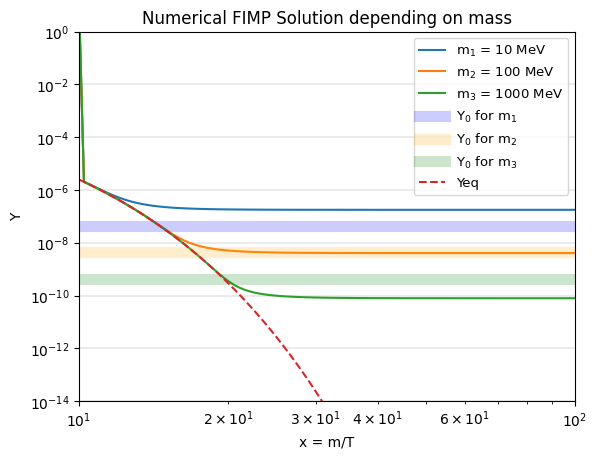

<Figure size 640x480 with 0 Axes>

In [ ]:
x = np.logspace(np.log10(xi),np.log10(xf),10**4)

plt.loglog(x_values, y_values, label = "m$_1$ = 10 MeV")
plt.grid(axis = "y", lw = 0.35)
plt.loglog(x_values2, y_values2, label = "m$_2$ = 100 MeV")
plt.loglog(x_values3, y_values3, label = "m$_3$ = 1000 MeV")
plt.loglog(Y01[0],Y01[1], label="Y$_0$ for m$_1$", linewidth=8, alpha=0.2, color="blue") #Y observado
plt.loglog(Y02[0],Y02[1], label="Y$_0$ for m$_2$", linewidth=8, alpha=0.2, color="orange") #Y observado
plt.loglog(Y03[0],Y03[1], label="Y$_0$ for m$_3$", linewidth=8, alpha=0.2, color="green") #Y observado
plt.loglog(x, Yeq(x),label='Yeq', linestyle = "dashed") #Y en equilibrio
#plt.loglog(x_Y0, Y0, label="Y0", linewidth=8, alpha=0.4, color="grey") #Y observado
plt.xlim(xi,xf)
plt.ylim(1e-14,1)
plt.xlabel('x = m/T')
plt.ylabel('Y')
plt.title('Numerical FIMP Solution depending on mass')
plt.legend(loc='upper right',fontsize= "9.5")
plt.show()
plt.savefig("FIMP numerical.png")

# Solucion analitica de SIMP

$Y_∞= \frac{(2)(116)x_f^2 g_*^{1/4}}{<σ|v^2|>^{1/2}(2\pi^2)g_{*s}m^2 m_{pl}^{1/2}}$

In [ ]:
σv = 3e7
m = 0.1
xf = 10**2
freeze = 78
xaxis = np.logspace(0,np.log10(xf),xf)
def Δ(x):
    #return (freeze**2)/(σv * (m**2) * (m_pl**(1/2))) #xf = 2100
    return ((2*np.pi**4/(45**2 * 1.66)) * (σv * g_s**2 * m**4 * m_pl * g_**(-1/2) * freeze**(-4)))**(-1/2) #xf = 78
yaxis = []
for x in range(1,(xf + 1)):  #starts at 1 to avoid division by 0.
    yaxis.append(Δ(x))

In [ ]:
σv = 3e7
m=0.1
solution = solve_ivp(dydx, x_range, initial_condition, method="LSODA", max_step=0.02)
xsimp , ysimp = solution.t , solution.y[0]

Text(0.5, 1.0, 'Comparison of analitical and numerical solution for SIMP mechanism')

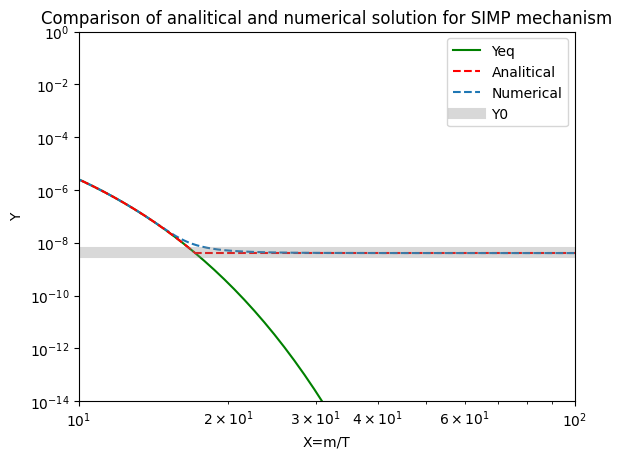

In [ ]:
xm1 = np.ma.masked_where(xaxis < 17, xaxis)
xm3 = np.ma.masked_where(xaxis > 17.8, xaxis)

plt.loglog(xaxis, Yeq(xaxis),label='Yeq', color = "green") #Y In equilibrium
plt.loglog(xm1, yaxis,label='Analitical', color = "red", linestyle = "dashed") #Y after freeze-out for analitical solution
plt.loglog(xsimp, ysimp, label = "Numerical", linestyle = "dashed")
plt.loglog(xm3, Yeq(xaxis), color = "red", linestyle = "dashed") #Y In equilibrium
plt.loglog(Y0(1,xf,m)[0],Y0(1,xf,m)[1], label="Y0", linewidth=8, alpha=0.3, color="grey") #Y observed


plt.xlabel("X=m/T")
plt.ylabel("Y")
plt.ylim(1e-14,1)
plt.xlim(10,xf)
plt.legend(loc='upper right')
plt.title("Comparison of analitical and numerical solution for SIMP mechanism")

# Other analisis

### Comparing General and non relativistic Yeq (Number density in during thermal equilibrium)

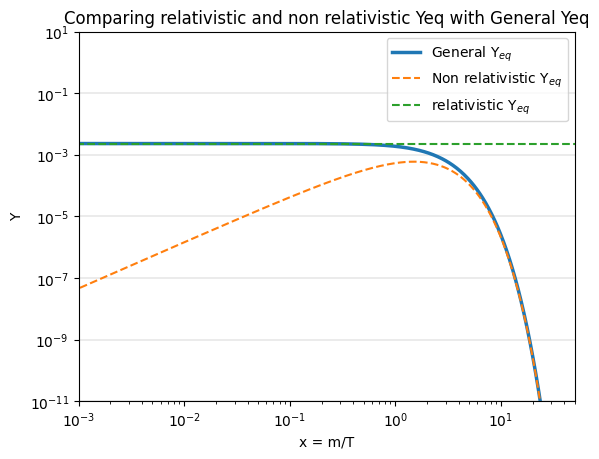

In [ ]:
def Yeq_rel(x):
    return x**0*7.7**(-3)

def Yeq_norel(x):
    return 0.145*(g/g_s)*x**(3/2)*np.exp(-x)

def Yeq_gen(x):
    return 45*(g/g_s)*x**2*(1/(4*np.pi**4))*(sp.kn(2,(x)))

x = np.logspace(-4,3,1000)
plt.grid(axis = "y", lw = 0.35)
plt.loglog(x, Yeq_gen(x),label='General Y$_{eq}$', linewidth=2.5) #Y en equilibrio
plt.loglog(x, Yeq_norel(x),label='Non relativistic Y$_{eq}$', linestyle = "dashed") #Non relativistic Yeq
plt.loglog(x, Yeq_rel(x),label='relativistic Y$_{eq}$', linestyle = "dashed") #Non relativistic Yeq
plt.xlim(10e-4,50)
plt.ylim(1e-11,10)
plt.xlabel('x = m/T')
plt.ylabel('Y')
plt.title('Comparing relativistic and non relativistic Yeq with General Yeq')
plt.legend(loc='upper right')
plt.show()
#plt.savefig("WIMP numerical.png")

### Comparing WIMP, FIMP and SIMP

In [ ]:
def dydx(x,Y):
    return -λ(x)*(x**(-2))*(Y**2-Yeq(x)**2)

#WIMP
x0 = 6
y0 = 1e-2  # Initial value of y at x = x0
initial_condition = (x0, y0)
xi = 1e-1
xf = 10**3
x_range = (xi, xf)  # Range of x values
σv = 1.5e-9
m = 100
solution = solve_ivp(dydx, x_range, initial_condition, method="LSODA",t_eval=np.logspace(np.log10(xi), np.log10(xf), 100), max_step=0.02)
x_wimp , y_wimp = solution.t , solution.y[0]


#FIMP
σv = 3e-29
m = 100
x_range = (xi, xf)
solution = solve_ivp(dydx, x_range, [1e-75], method="LSODA", t_eval = np.logspace(np.log10(xi), np.log10(xf), 100), max_step = 0.02)
x_fimp , y_fimp = solution.t , solution.y[0]

#SIMP
def λs(x):
    return (σv*s(x)**2)/(H(x)*x**3)

def dydx(x,Y):
    return -λs(x)*(Y**3 - (Y**2)*Yeq(x))

σv = 3e2
m = 100
solution = solve_ivp(dydx, (10,xf), (15,1e-3), method="LSODA", max_step=0.02)
x_simp , y_simp = solution.t , solution.y[0]

#Y0
#Y0 = np.ones(xf)*(4.3e-12)
#x_Y0 = np.linspace(xi, xf,xf)

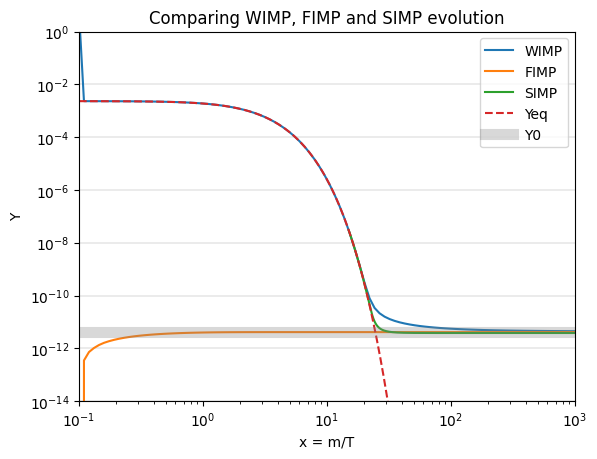

<Figure size 640x480 with 0 Axes>

In [ ]:
x = np.logspace(np.log10(xi),np.log10(xf),10**4)
simp_mask = np.ma.masked_where(x_simp < 15, x_simp)


plt.loglog(x_wimp, y_wimp,label="WIMP")
plt.grid(axis = "y", lw = 0.35)
plt.loglog(x_fimp, y_fimp,label="FIMP")
plt.loglog(simp_mask, y_simp,label="SIMP")
plt.loglog(x, Yeq(x),label='Yeq', linestyle = "dashed") #Y en equilibrio
plt.loglog(Y0(xi,xf,m)[0],Y0(xi,xf,m)[1], label="Y0", linewidth=8, alpha=0.3, color="grey")
plt.ylim(1e-14,1)
plt.xlim(xi,xf)
plt.xlabel('x = m/T')
plt.ylabel('Y')
plt.title('Comparing WIMP, FIMP and SIMP evolution')
plt.legend(loc='upper right')
plt.show()
plt.savefig("FIMP numerical.png")

###The <σv> and m relation for WIMP

In [ ]:
def wimp(ov , m):
    g = 1
    g_s = 100
    g_ = 100
    σv = ov
    m = m
    m_pl = 1.22e19

    def Yeq(x):
        return 45*(g/g_s)*x**2*(1/(4*np.pi**4))*(sp.kn(2,(x)))

    def H(x):
        return 1.66 * g_**(1/2) * m**2/(x**2 * m_pl)

    def s(x):
        return (2*np.pi**2/45)*g_s*(m**3/x**3)

    def λ(x):
        return (x*σv*s(x))/H(x)

    def dydx(x,Y):
        return -λ(x)*(x**(-2))*(Y**2-Yeq(x)**2)
    σv = ov
    m = m
    initial_condition = (10,1e-8)
    xf = 10**3
    x_range = (6, xf)
    solution = solve_ivp(dydx, x_range, initial_condition, method="LSODA", rtol = 1e-7, max_step = 0.02)
    return (solution.t , solution.y[0])

In [ ]:
datos_ov = []
datos_m = []
ov=1.5e-9
m=100

for m in np.linspace(1,10,10):
    datos_ov.append(ov)
    datos_m.append(m)


In [ ]:
datos_ov

[1.5e-09,
 1.5e-09,
 1.5e-09,
 1.5e-09,
 1.5e-09,
 1.5e-09,
 1.5e-09,
 1.5e-09,
 1.5e-09,
 1.5e-09]

In [ ]:
abs(wimp(1.5e-9,100)[1][-1] - 4.4629829e-12) > 1e-14

False

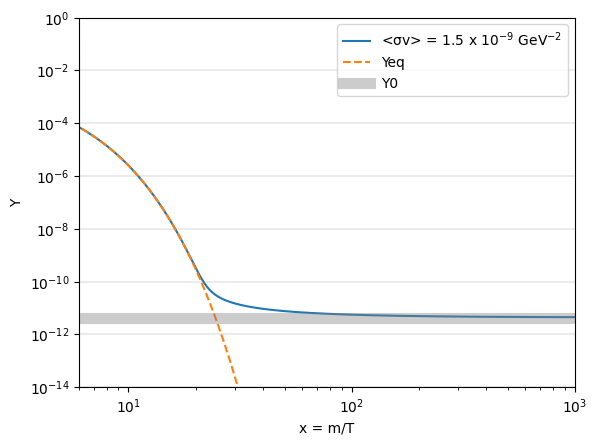

<Figure size 640x480 with 0 Axes>

In [ ]:
x = np.logspace(0,3,xf)
x_values , y_values = wimp(1.5e-9,100)

plt.loglog(x_values, y_values)
plt.grid(axis = "y", lw = 0.35)
#plt.loglog(x_values2, y_values2, linestyle = "dashed")
#plt.loglog(x_values3, y_values3, linestyle = "dashed")
plt.loglog(x, Yeq(x),label='Yeq', linestyle = "dashed") #Y en equilibrio
plt.loglog(Y0(1,xf,100)[0],Y0(1,xf,100)[1], label="Y0", linewidth=8, alpha=0.4, color="grey") #Y observado
plt.xlim(6,1000)
plt.ylim(1e-14,1)
plt.xlabel('x = m/T')
plt.ylabel('Y')
#plt.title('Numerical WIMP Solution')
plt.legend(("<σv> = 1.5 x 10$^{-9}$ GeV$^{-2}$", "Yeq", "Y0"),
           loc='upper right')
plt.show()
plt.savefig("WIMP numerical.png")